In [150]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [5]:
data.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
data[data['Quantity']<0].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,10624.000000,10624,10624.000000,8905.000000
mean,-45.607210,2011-06-24 19:32:09.346761984,42.308012,14991.667266
min,-80995.000000,2010-12-01 09:41:00,0.000000,12346.000000
25%,-10.000000,2011-03-24 11:23:15,1.060000,13510.000000
50%,-2.000000,2011-07-04 15:57:00,2.100000,14895.000000
75%,-1.000000,2011-10-06 19:52:00,4.950000,16393.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1092.214216,NaN,623.481552,1706.772357


In [9]:
data.shape

(541909, 8)

In [10]:
data.drop(data[data['Quantity']<0].index, inplace=True)

In [11]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,531285.000000,531285,531285.000000,397924.000000
mean,10.655262,2011-07-04 18:15:45.816539136,3.857296,15294.315171
min,1.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:01:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.830323,NaN,41.810047,1713.169877


In [12]:
data.shape

(531285, 8)

In [13]:
data.describe(exclude=['int64', 'float64'])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,531285.0,531285,530693,531285,531285
unique,20728.0,3941,4077,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,United Kingdom
freq,1114.0,2270,2327,NaN,486286
mean,NaN,NaN,NaN,2011-07-04 18:15:45.816539136,NaN
min,NaN,NaN,NaN,2010-12-01 08:26:00,NaN
25%,NaN,NaN,NaN,2011-03-28 11:59:00,NaN
50%,NaN,NaN,NaN,2011-07-20 12:01:00,NaN
75%,NaN,NaN,NaN,2011-10-19 12:35:00,NaN
max,NaN,NaN,NaN,2011-12-09 12:50:00,NaN


In [14]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [15]:
# using the simple imputer from the sklearn we will impute the missing values of the categorical data of description with most_frequent method.

from sklearn.impute import SimpleImputer
impute_description = SimpleImputer(strategy='most_frequent')
data[['Description']] = impute_description.fit_transform(data[['Description']])

In [16]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [17]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
# Let me add an another column into the dataset 'sales'

data['Sales'] = data['Quantity']*data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [21]:
len(data['CustomerID'].unique()), new_data['CustomerID'].shape

(4339, (4339,))

In [22]:
# now we will get the number of transactions per each customer

num_transactions = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_transactions

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [100]:
# now check for the last transaction made by the customer

data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
last_trans = data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()
last_trans

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [102]:
merge_new = pd.merge(num_transactions, last_trans, how='inner', on='CustomerID')
merge_new

,CustomerID,InvoiceNo,Country,Last Transaction
0,12346.0,1,United Kingdom,325
1,12347.0,182,Iceland,366
2,12348.0,31,Finland,357
3,12349.0,73,Italy,18
4,12350.0,17,Norway,309
...,...,...,...,...
4342,18280.0,10,United Kingdom,277
4343,18281.0,7,United Kingdom,180
4344,18282.0,12,United Kingdom,125
4345,18283.0,756,United Kingdom,336


In [104]:
final_data = pd.merge(new_data, merge_new, how='inner', on='CustomerID')
final_data

,CustomerID,Sales,InvoiceNo,Country,Last Transaction
0,12346.0,77183.60,1,United Kingdom,325
1,12347.0,4310.00,182,Iceland,366
2,12348.0,1797.24,31,Finland,357
3,12349.0,1757.55,73,Italy,18
4,12350.0,334.40,17,Norway,309
...,...,...,...,...,...
4342,18280.0,180.60,10,United Kingdom,277
4343,18281.0,80.82,7,United Kingdom,180
4344,18282.0,178.05,12,United Kingdom,125
4345,18283.0,2094.88,756,United Kingdom,336


In [106]:
final_data['No of Transactions'] = final_data['InvoiceNo']

<Axes: >

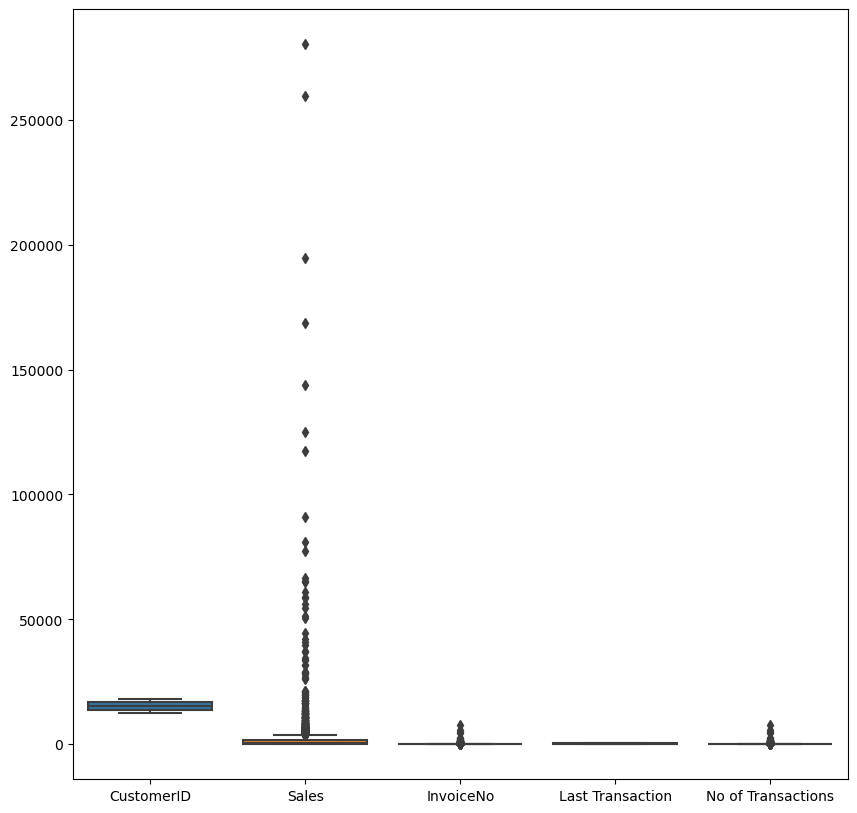

In [108]:
plt.figure(figsize=(10,10))
sns.boxplot(final_data)

In [109]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          4347 non-null   float64
 1   Sales               4347 non-null   float64
 2   InvoiceNo           4347 non-null   int64  
 3   Country             4347 non-null   object 
 4   Last Transaction    4347 non-null   int64  
 5   No of Transactions  4347 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 203.9+ KB


In [112]:
for column in ['Sales', 'No of Transactions']:
    q1 = final_data[column].quantile(0.25)
    q3 = final_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    new_data2 = final_data[(final_data[column]>lower_bound)&(final_data[column]<upper_bound)]
    final_data[column] = final_data[column].clip(lower=lower_bound, upper=upper_bound)
    
    
    

In [114]:
new_data2

,CustomerID,Sales,InvoiceNo,Country,Last Transaction,No of Transactions
0,12346.0,3717.12,1,United Kingdom,325,1
1,12347.0,3717.12,182,Iceland,366,182
2,12348.0,1797.24,31,Finland,357,31
3,12349.0,1757.55,73,Italy,18,73
4,12350.0,334.40,17,Norway,309,17
...,...,...,...,...,...,...
4341,18278.0,173.90,9,United Kingdom,73,9
4342,18280.0,180.60,10,United Kingdom,277,10
4343,18281.0,80.82,7,United Kingdom,180,7
4344,18282.0,178.05,12,United Kingdom,125,12


In [116]:
final_data.drop(columns='InvoiceNo', inplace=True)

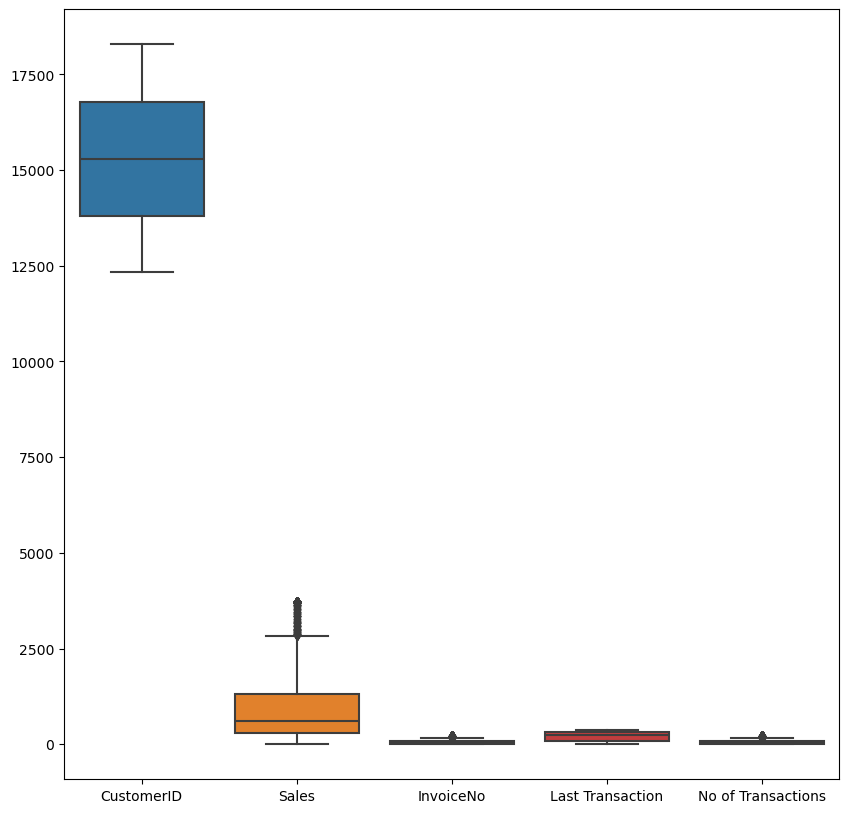

In [118]:
plt.figure(figsize=(10,10))
sns.boxplot(new_data2)
plt.show()

<Axes: >

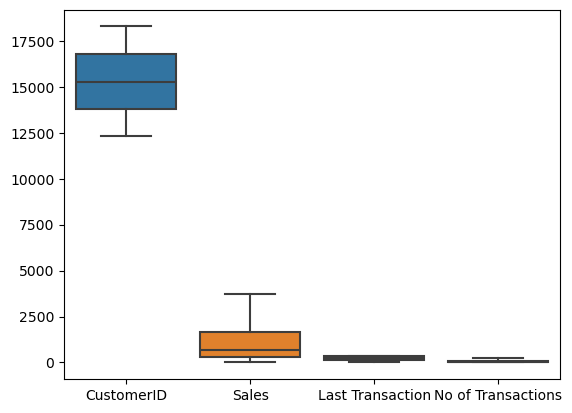

In [119]:
sns.boxplot(final_data)

In [121]:
final_data[['CustomerID', 'Sales', 'No of Transactions']].corr()

,CustomerID,Sales,No of Transactions
CustomerID,1.000000,-0.090911,-0.001600
Sales,-0.090911,1.000000,0.766604
No of Transactions,-0.001600,0.766604,1.000000


<Axes: >

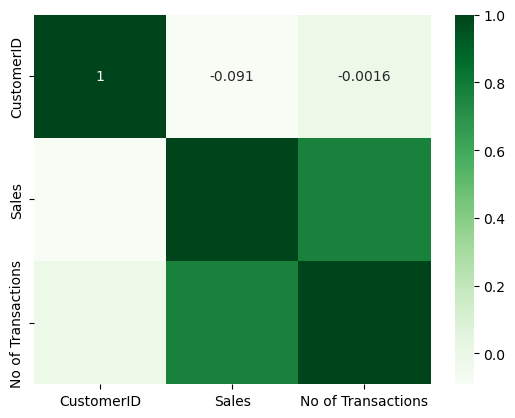

In [124]:
sns.heatmap(final_data[['CustomerID', 'Sales', 'No of Transactions']].corr(), cmap='Greens', annot=True)

In [125]:
final_data.head(15)

,CustomerID,Sales,Country,Last Transaction,No of Transactions
0,12346.0,3717.12,United Kingdom,325,1.0
1,12347.0,3717.12,Iceland,366,182.0
2,12348.0,1797.24,Finland,357,31.0
3,12349.0,1757.55,Italy,18,73.0
4,12350.0,334.40,Norway,309,17.0
5,12352.0,2506.04,Norway,296,85.0
6,12353.0,89.00,Bahrain,203,4.0
7,12354.0,1079.40,Spain,231,58.0
8,12355.0,459.40,Bahrain,213,13.0
9,12356.0,2811.43,Portugal,325,59.0


In [128]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          4347 non-null   float64
 1   Sales               4347 non-null   float64
 2   Country             4347 non-null   object 
 3   Last Transaction    4347 non-null   int64  
 4   No of Transactions  4347 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 169.9+ KB


In [130]:
scaling_data = final_data[['Sales', 'Last Transaction', 'No of Transactions']]

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaling_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = ['Sales', 'Last Transaction', 'No of Transactions']
scaled_data

,Sales,Last Transaction,No of Transactions
0,1.000000,0.871314,0.000000
1,1.000000,0.981233,0.809843
2,0.483503,0.957105,0.134228
3,0.472826,0.048257,0.322148
4,0.089962,0.828418,0.071588
...,...,...,...
4342,0.048586,0.742627,0.040268
4343,0.021743,0.482574,0.026846
4344,0.047900,0.335121,0.049217
4345,0.563576,0.900804,1.000000


In [172]:
scaled_data['Country'] = final_data['Country']

In [174]:
scaled_data

,Sales,Last Transaction,No of Transactions,Country
0,1.000000,0.871314,0.000000,United Kingdom
1,1.000000,0.981233,0.809843,Iceland
2,0.483503,0.957105,0.134228,Finland
3,0.472826,0.048257,0.322148,Italy
4,0.089962,0.828418,0.071588,Norway
...,...,...,...,...
4342,0.048586,0.742627,0.040268,United Kingdom
4343,0.021743,0.482574,0.026846,United Kingdom
4344,0.047900,0.335121,0.049217,United Kingdom
4345,0.563576,0.900804,1.000000,United Kingdom


In [176]:
out_data = scaled_data.drop(columns='Country')

In [178]:
out_data

,Sales,Last Transaction,No of Transactions
0,1.000000,0.871314,0.000000
1,1.000000,0.981233,0.809843
2,0.483503,0.957105,0.134228
3,0.472826,0.048257,0.322148
4,0.089962,0.828418,0.071588
...,...,...,...
4342,0.048586,0.742627,0.040268
4343,0.021743,0.482574,0.026846
4344,0.047900,0.335121,0.049217
4345,0.563576,0.900804,1.000000


C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\clust

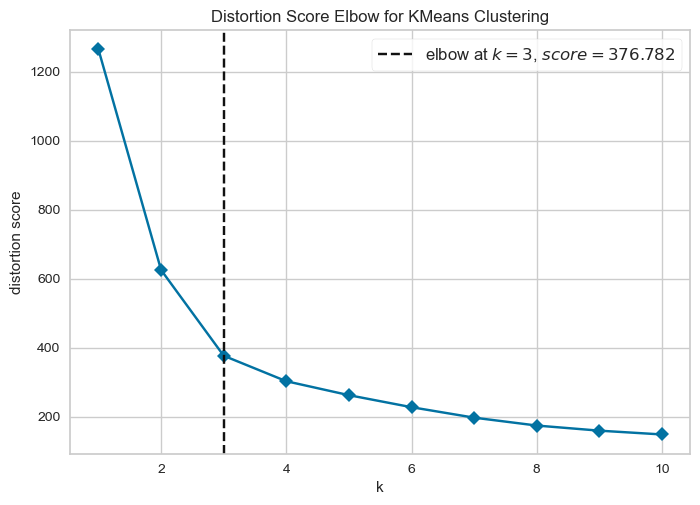

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [180]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(out_data)
visualizer.show()

In [181]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(out_data)
out_data['Clusters']=y_predicted
out_data

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Sales,Last Transaction,No of Transactions,Clusters
0,1.000000,0.871314,0.000000,1
1,1.000000,0.981233,0.809843,1
2,0.483503,0.957105,0.134228,2
3,0.472826,0.048257,0.322148,0
4,0.089962,0.828418,0.071588,2
...,...,...,...,...
4342,0.048586,0.742627,0.040268,2
4343,0.021743,0.482574,0.026846,0
4344,0.047900,0.335121,0.049217,0
4345,0.563576,0.900804,1.000000,1


In [184]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(out_data, km.labels_, metric='euclidean')
print(score)

from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(out_data)
out_data['clusters_hierarchial']= y_predicted_hierarchial
out_data.head(30)

0.7392046543794322


,Sales,Last Transaction,No of Transactions,Clusters,clusters_hierarchial
0,1.000000,0.871314,0.000000,1,2
1,1.000000,0.981233,0.809843,1,2
2,0.483503,0.957105,0.134228,2,0
3,0.472826,0.048257,0.322148,0,1
4,0.089962,0.828418,0.071588,2,0
5,0.674189,0.793566,0.375839,1,2
6,0.023943,0.544236,0.013423,2,0
7,0.290386,0.619303,0.255034,2,0
8,0.123590,0.571046,0.053691,2,0
9,0.756346,0.871314,0.259508,1,2
